# Calculate Silhouette Score in Test Dataset
This notebook calculates the silhouette score for a test dataset using UMAP embeddings and cluster labels. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from STimage_benchmarks.silhouette_score import SilhouetteAnalyzer

In [2]:
X = pd.read_csv('../data/PBMC/output/umap_embeddings.csv')  # shape: (n_samples, n_components)
y_benchmark = pd.read_csv('../data/PBMC/output/benchmark_cluster_labels.csv')      # shape: (n_samples, 1)
y_SingleR = pd.read_csv('../data/PBMC/output/singleR_cluster_labels.csv')  # shape: (n_samples, 1)
y_SCINA = pd.read_csv('../data/PBMC/output/SCINA_cluster_labels.csv')  # shape: (n_samples, 1)

In [3]:
analyzer = SilhouetteAnalyzer(X, y_benchmark)

In [5]:
score_benchmark = analyzer.compute_silhouette_score()
print(f'Silhouette Score: {score_benchmark}')

Silhouette Score: 0.46703625925750425


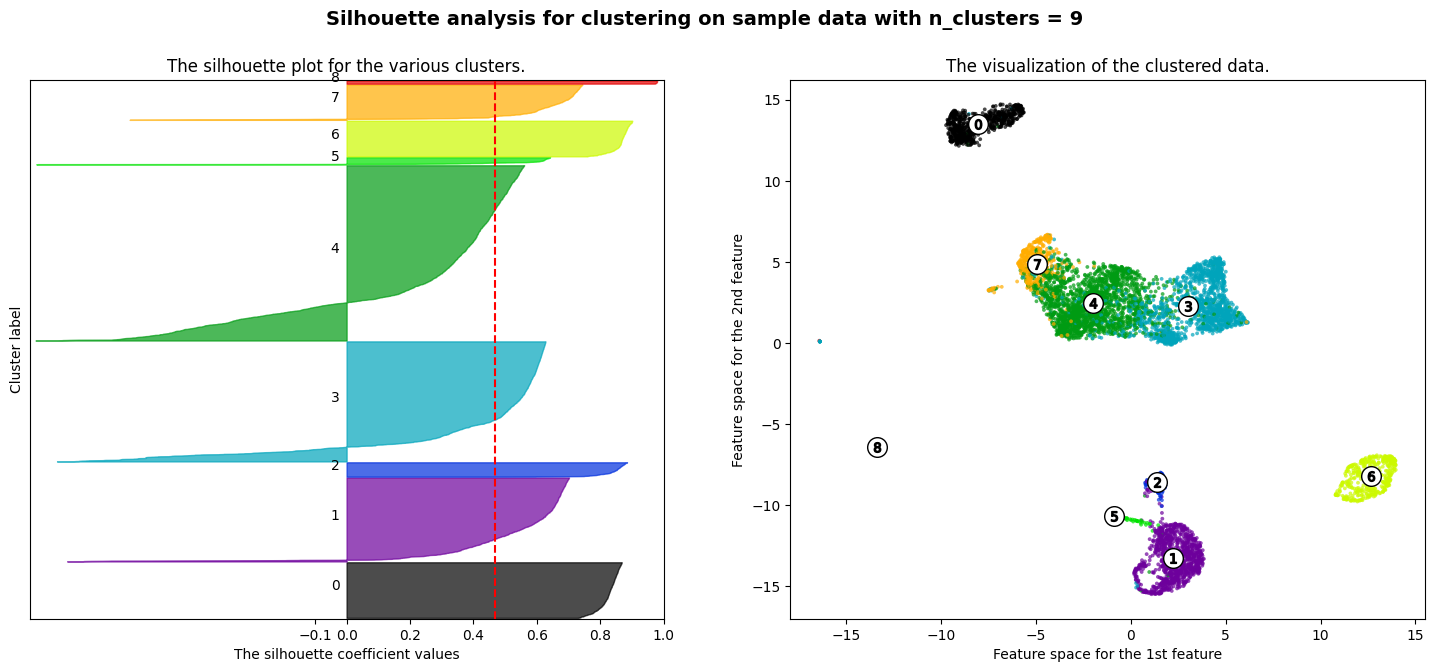

In [6]:
analyzer.plot_silhouette()

In [7]:
analyzer = SilhouetteAnalyzer(X, y_SingleR)

In [8]:
score_SingleR = analyzer.compute_silhouette_score()
print(f'Silhouette Score: {score_SingleR}')

Silhouette Score: 0.14628874567608732


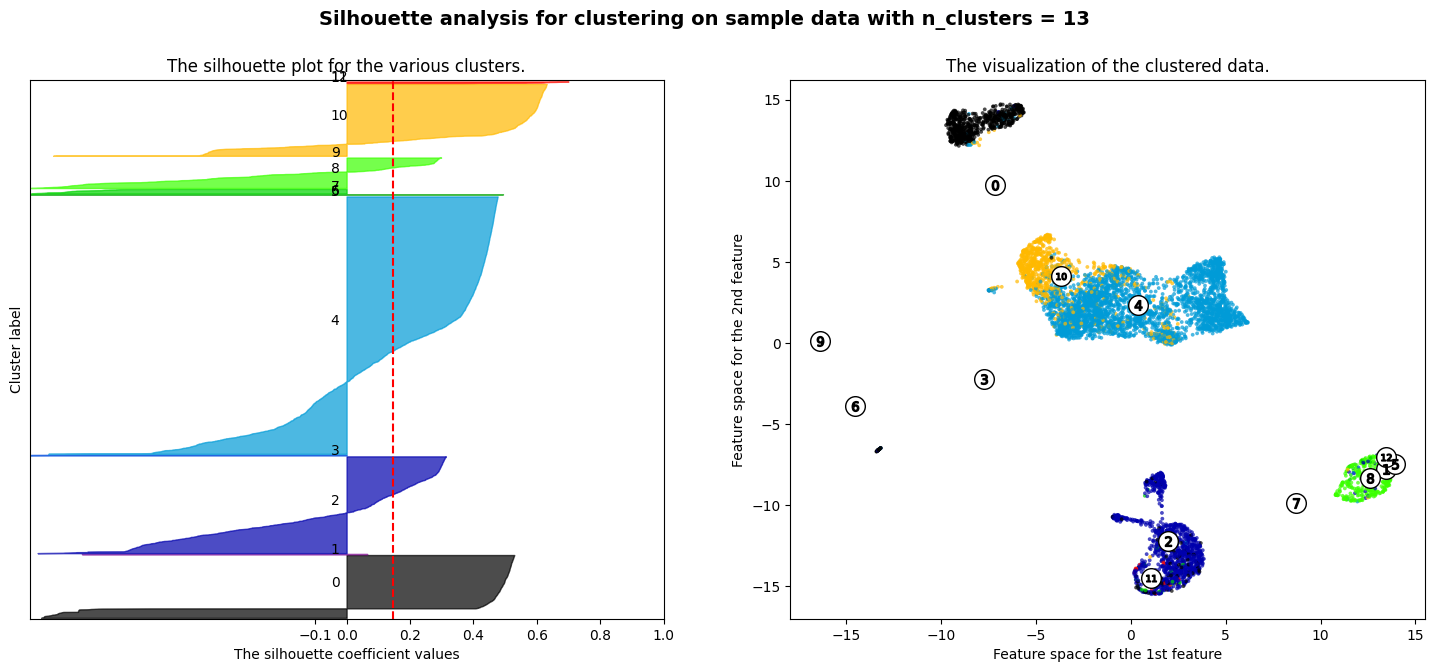

In [9]:
analyzer.plot_silhouette()

In [10]:
analyzer = SilhouetteAnalyzer(X, y_SCINA)

In [11]:
score_SCINA = analyzer.compute_silhouette_score()
print(f'Silhouette Score: {score_SCINA}')

Silhouette Score: -0.35757059909524813


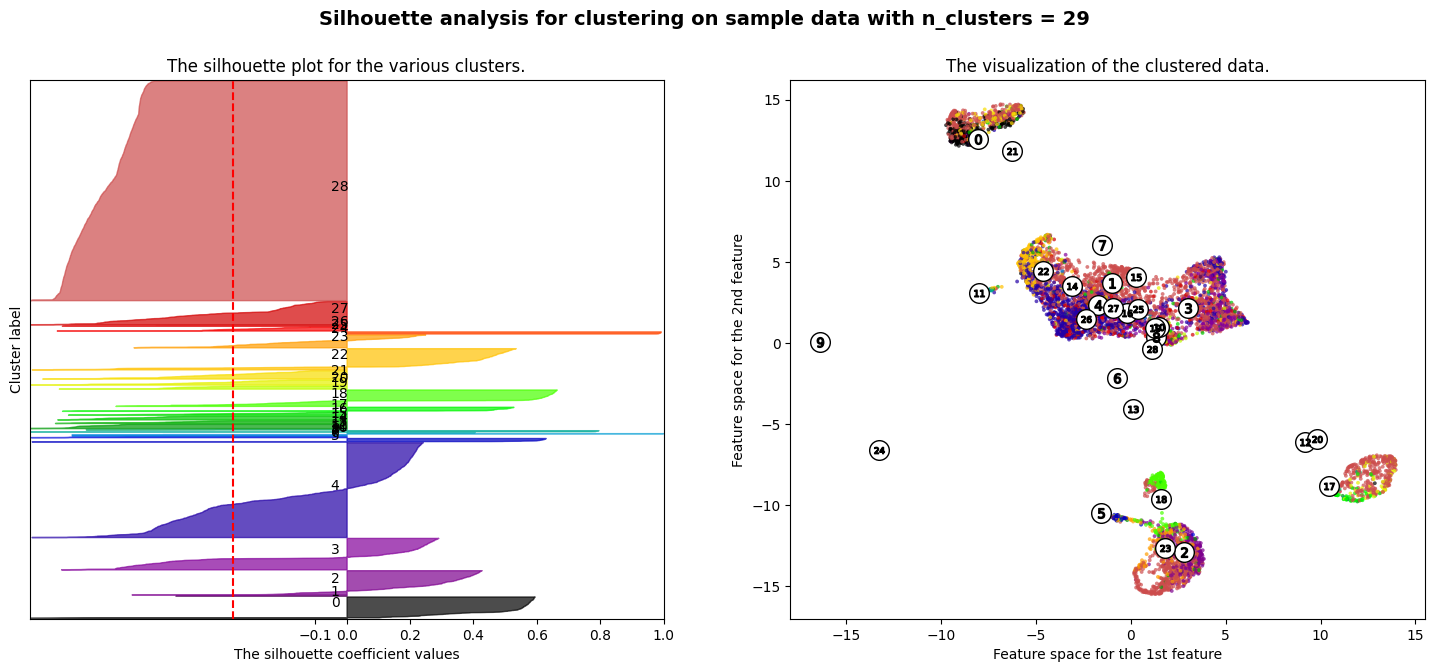

In [12]:
analyzer.plot_silhouette()

In [13]:
# Validate comparing to reference
benchmark_shifted = score_benchmark + 1
SingleR_shifted = score_SingleR + 1
SCINA_shifted = score_SCINA + 1

In [14]:
pt_SingleR = (SingleR_shifted / benchmark_shifted) * 100
pt_SCINA = (SCINA_shifted / benchmark_shifted) * 100
print(f'SingleR: {pt_SingleR}', 
      f'SCINA: {pt_SCINA}')

SingleR: 78.1363608733329 SCINA: 43.79096950404607
